# OpenML Python Tutorial
_Joaquin Vanschoren and the OpenML Team_

This tutorial explains how you can connect to the OpenML platform for exchanging machine learning datasets, pipelines, models, and evaluations.

Use it to collaborate online, log your experiments, and/or share your work in a reproducible and reusable way.

Link to docs

## Prerequisites
You will need a Python working environment with:  
    
* Python 3 or higher
* numpy, scipy, matplotlib, pandas,...
* scikit-learn 0.20 or higher (for building models)
* jupyter (to run these notebooks)
* openml 0.8.0 or higher

### Option 1: Google Colab
Google Colab allows you to run this notebook in your Google Drive. Hence, you can run it in your browser without installing anything.

* Open [this notebook](http://goo.gl/VwbKb4)
* Use `File > Make a copy in Drive` to create your own copy to work with.

### Option 2: Binder
An open source alternative to run this notebook in your browser is _Binder_

* Go to https://mybinder.org/
* Copy-paste the repository name: https://github.com/openml/openml-tutorial
* Click launch.

### Option 3: Anaconda
The easiest way to set things up locally (especially for Windows) is to install an [Anaconda](https://www.continuum.io/downloads) environment. Choose Python 3.

After installation, run the following on the commandline:
```
conda install numpy scipy matplotlib pandas scikit-learn seaborn pprint jupyter
```

### Option 4: pip

You can also install everything via pip, ideally in a [virtual environment](http://docs.python-guide.org/en/latest/dev/virtualenvs/).

After installing pip, run the following on the commandline:
```
pip install numpy scipy matplotlib pandas scikit-learn seaborn pprint jupyter
```

### Running this notebook locally
For a local setup, use git to clone the [tutorial repository](https://github.com/openml/openml-tutorial) and start jupyter notebooks.

```
git clone https://github.com/openml/openml-tutorial
cd openml-tutorial
jupyter notebook
```

## Installing OpenML
You can install the OpenML API via pip. In will be pre-installed if you use Binder.

In your Anaconda or custom environment, run
``` python
pip install openml
```

In Google colab or Jupyter, install by running (note the '!')
``` python
!pip install openml
```

## Authentication

To upload new datasets, experiments,... to the OpenML server, you first need to find your API key.

* Create an OpenML account (free) on http://www.openml.org. 
* Log in, click your avatar/picture, open 'API authentication'.
* Your API key is a secret 32-character string

You can copy this API key into your code (but only if you never share it):

In [101]:
# Uncomment and set your OpenML key. 
import openml as oml
#oml.config.apikey = 'YOUR_KEY'

## Config file
It is safer to set your API key in a config file. By default this is created in `~/.openml/config` and loaded when you import openml. 

It has the following settings (and defaults):

``` python
apikey=YOUR_KEY
server=https://www.openml.org/api/v1
cachedir=/HOME/.openml/cache
verbosity=1
confirm.upload=FALSE
```

In [109]:
# Making sure we are using the right settings
oml.config.server = 'https://www.openml.org/api/v1/xml' 
oml.config.apikey = '5c4fef1424a7ff1d3cd33640bf90acb1'

## Guides and cheat sheets
You are now ready to start playing with OpenML. 

We also provide [this handy cheat sheet](OpenML Python cheat sheet) with the most common commands.

Also, you can browse the [official OpenML Python docs](https://openml.github.io/openml-python) for further examples and guidance.

In [164]:
# Generic imports and presentation styling
%matplotlib inline
from IPython.display import set_matplotlib_formats, display, HTML
HTML('''<style>
        html, body{overflow-y: visible !important} 
        .CodeMirror{min-width:100% !important;} 
        .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} 
        .output_subarea pre{width:100%}
        table.dataframe {font-size:80%;}
        .prompt {display:none;}
        </style>''') # For slides

## Datasets
OpenML aims to allow _frictionless_ sharing of data:
* Explore and search many thousands of datasets
* Every dataset is imported directly as an array/dataframe
* Rich and uniform meta-data. 

### Exploring datasets
`datasets.list_datasets()` returns a dict with all datasets.

In [111]:
import openml as oml
import pandas as pd
columns = ['did','name','NumberOfInstances', 'NumberOfFeatures','NumberOfClasses']

In [112]:
data_dict = oml.datasets.list_datasets() # Returns a dict
data_list = pd.DataFrame.from_dict(data_dict, orient='index') # dataframe
print("First 10 of %s datasets..." % len(data_list))
data_list[columns][:10]

First 10 of 2582 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
2,2,anneal,898.0,39.0,5.0
3,3,kr-vs-kp,3196.0,37.0,2.0
4,4,labor,57.0,17.0,2.0
5,5,arrhythmia,452.0,280.0,13.0
6,6,letter,20000.0,17.0,26.0
7,7,audiology,226.0,70.0,24.0
8,8,liver-disorders,345.0,7.0,0.0
9,9,autos,205.0,26.0,6.0
10,10,lymph,148.0,19.0,4.0
11,11,balance-scale,625.0,5.0,3.0


You can filter datasets by:
* `data_name` and `data_version`
* verification `status` ('active', 'in_preparation', 'deactivated')
    * Default: 'active'
* `tag` (tags added by you or other users)
* `number_instances`, `number_features`, `number_classes`, `number_missing_values`

In [113]:
d = oml.datasets.list_datasets(number_instances = '10000..20000',  
                               number_features = '10..20')
pd.DataFrame.from_dict(d, orient='index')[columns][:10] 

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
6,6,letter,20000,17,26
32,32,pendigits,10992,17,10
216,216,elevators,16599,19,0
846,846,elevators,16599,19,2
977,977,letter,20000,17,2
1019,1019,pendigits,10992,17,2
1120,1120,MagicTelescope,19020,12,2
1199,1199,BNG(echoMonths),17496,10,0
1222,1222,letter-challenge-unlabeled.arff,20000,17,3
1414,1414,Kaggle_bike_sharing_demand_challange,10886,12,0


Alternatively, download the whole list as a dataframe and query the meta-data

In [114]:
data_list.query('NumberOfInstances > 10000 & NumberOfFeatures > 10'
               ).sort_values(['name'])[columns][:10] 

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
274,274,20_newsgroups.drift,399940.0,1002.0,2.0
40517,40517,20_newsgroups.drift,399940.0,1001.0,2.0
727,727,2dplanes,40768.0,11.0,2.0
215,215,2dplanes,40768.0,11.0,0.0
41138,41138,APSFailure,76000.0,171.0,2.0
296,296,Ailerons,13750.0,41.0,0.0
1240,1240,AirlinesCodrnaAdult,1076790.0,30.0,2.0
1197,1197,BNG(2dplanes),177147.0,11.0,0.0
1207,1207,BNG(Ailerons),1000000.0,41.0,0.0
1205,1205,BNG(Australian),1000000.0,15.0,2.0


This also allows to search for terms in the dataset name

In [115]:
data_list.query('name.str.contains("eeg")', engine='python')[columns]

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1471,1471,eeg-eye-state,14980.0,15.0,2.0


### Download datasets
`datasets.get_dataset(data_id)` returns an `OpenMLData` object with the dataset and meta-data.

In [116]:
dataset = oml.datasets.get_dataset(1471)
print(dataset.description[:500])

**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after


#### Get the data itself
`OpenMLData.getdata()` returns the actual data as numpy arrays. 

```python
X = dataset.get_data()
```

Optional arguments:
* `target=dataset.default_target_attribute` also return the target (y) values
* `return_attribute_names=True` also return the attributes names
* `return_categorical=True` return a boolean array indicating categorical attributes

In [117]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, 
    return_attribute_names=True)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg[:10]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,4329.229980,4009.229980,4289.229980,4148.209961,4350.259766,4586.149902,4096.919922,4641.029785,4222.049805,4238.459961,4211.279785,4280.509766,4635.899902,4393.850098
1,4324.620117,4004.620117,4293.850098,4148.720215,4342.049805,4586.669922,4097.439941,4638.970215,4210.770020,4226.669922,4207.689941,4279.490234,4632.819824,4384.100098
2,4327.689941,4006.669922,4295.379883,4156.410156,4336.919922,4583.589844,4096.919922,4630.259766,4207.689941,4222.049805,4206.669922,4282.049805,4628.720215,4389.229980
3,4328.720215,4011.790039,4296.410156,4155.899902,4343.589844,4582.560059,4097.439941,4630.770020,4217.439941,4235.379883,4210.770020,4287.689941,4632.310059,4396.410156
4,4326.149902,4011.790039,4292.310059,4151.279785,4347.689941,4586.669922,4095.899902,4627.689941,4210.770020,4244.100098,4212.819824,4288.209961,4632.819824,4398.459961
5,4321.029785,4004.620117,4284.100098,4153.330078,4345.640137,4587.180176,4093.330078,4616.919922,4202.560059,4232.819824,4209.740234,4281.029785,4628.209961,4389.740234
6,4319.490234,4001.030029,4280.509766,4151.790039,4343.589844,4584.620117,4089.739990,4615.899902,4212.310059,4226.669922,4201.029785,4269.740234,4625.129883,4378.459961
7,4325.640137,4006.669922,4278.459961,4143.080078,4344.100098,4583.080078,4087.179932,4614.870117,4205.640137,4230.259766,4195.899902,4266.669922,4622.049805,4380.509766
8,4326.149902,4010.770020,4276.410156,4139.490234,4345.129883,4584.100098,4091.280029,4608.209961,4187.689941,4229.740234,4202.049805,4273.850098,4627.180176,4389.740234
9,4326.149902,4011.280029,4276.919922,4142.049805,4344.100098,4582.560059,4092.820068,4608.720215,4194.359863,4228.720215,4212.819824,4277.950195,4637.439941,4393.330078


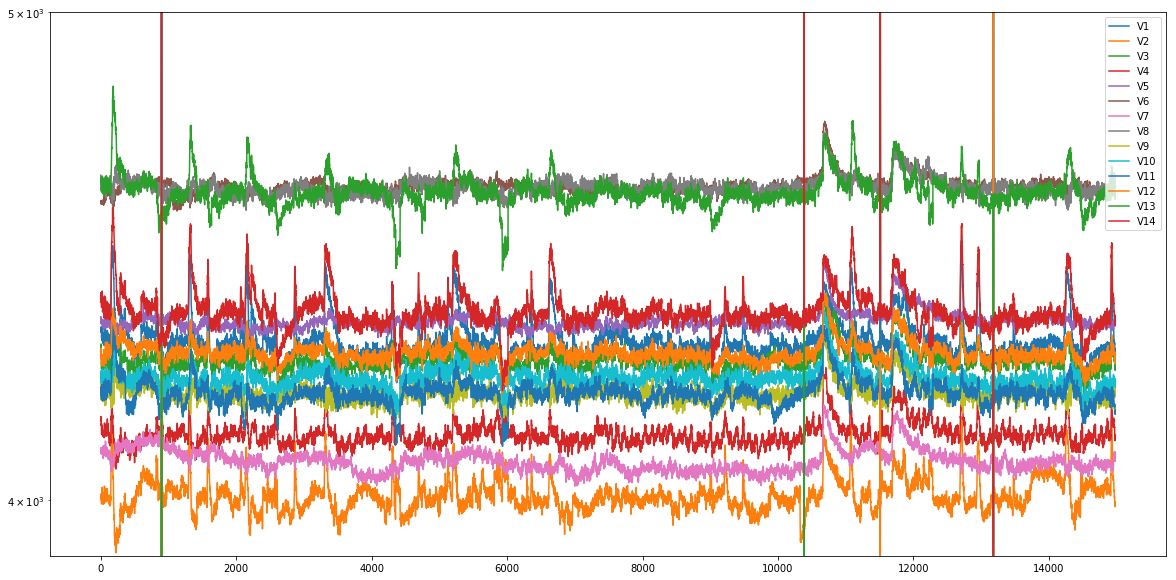

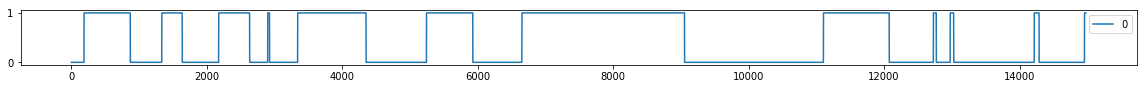

In [118]:
eeg.plot(logy=True,ylim=(3900,5000),figsize=(20,10))
pd.DataFrame(y).plot(figsize=(20,1));

#### Get the meta-data
Every dataset comes with rich meta-data:
* name, version, date, creator, licence, description, ...
* `dataset.qualities` returns 100+ statistical data properties
* `dataset.features` returns all variables and their data types
* tags added by the OpenML community

In [64]:
vars(dataset)

{'_dataset': None,
 'citation': None,
 'collection_date': None,
 'contributor': None,
 'creator': None,
 'data_file': '/Users/joa/.openml/cache/org/openml/www/datasets/1471/dataset.arff',
 'data_pickle_file': '/Users/joa/.openml/cache/org/openml/www/datasets/1471/dataset.pkl.py3',
 'dataset_id': 1471,
 'default_target_attribute': 'Class',
 'description': "**Author**: Oliver Roesler  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  \n**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  \n\nAll data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first

### sklearn fetch_openml
You can also fetch OpenML datasets directly through scikit-learn

In [68]:
from sklearn.datasets import fetch_openml 
eeg_data = fetch_openml(name='eeg-eye-state', version=1) 
eeg_data.details

{'default_target_attribute': 'Class',
 'file_id': '1587924',
 'format': 'ARFF',
 'id': '1471',
 'licence': 'Public',
 'md5_checksum': '32086b7bec4daaa9cbe5f19efa63368c',
 'name': 'eeg-eye-state',
 'processing_date': '2018-10-03 21:41:12',
 'status': 'active',
 'tag': ['brain',
  'EEG',
  'OpenML100',
  'study_123',
  'study_14',
  'study_34',
  'study_7',
  'time_series',
  'uci'],
 'upload_date': '2015-05-22T16:40:04',
 'url': 'https://www.openml.org/data/v1/download/1587924/eeg-eye-state.arff',
 'version': '1',
 'visibility': 'public'}

### Upload datasets
You can easily share your own datasets by creating an `OpenMLData` object and publishing it. The data can be in the form of native lists, numpy arrays, pandas dataframes, or locally stored files. 

See the [documentation](https://openml.github.io/openml-python/master/examples/create_upload_tutorial.html#sphx-glr-examples-create-upload-tutorial-py) for detailed examples.

#### Helper function
`create_dataset` helps to create an OpenML dataset from data and an attribute description
``` python
dataset = datasets.functions.create_dataset(
    data=data, # data array
    attributes=attributes, # list of attributes
    name='..', # <128 characters, a-z, A-Z, 0-9, _, -, ., ()
    description='..', # Textual description 
    creator='..', # Creator of this dataset
    licence='..', # Data licence
    default_target_attribute='..', # Optional target attribute(s)
    citation='..', # How to cite the dataset
    original_data_url='..', # Link to dataset elsewhere
)
```

Data format:
* `data` should be a single dataframe or array
* `attributes` is a list of names and data types (ARFF format)
``` python
attribute_names = [
    ('outlook', ['sunny', 'overcast', 'rainy']),
    ('temperature', 'REAL'),
    ('humidity', 'REAL'),
    ('windy', ['TRUE', 'FALSE']),
    ('play', ['yes', 'no']),
]
```

#### Dataset is a pandas DataFrame

In [88]:
data = [
    ['sunny', 85, 85, 'FALSE', 'no'],
    ['sunny', 80, 90, 'TRUE', 'no'],
    ['overcast', 83, 86, 'FALSE', 'yes'],
    ['rainy', 70, 96, 'FALSE', 'yes'],
    ['rainy', 68, 80, 'FALSE', 'yes'],
    ['rainy', 65, 70, 'TRUE', 'no'],
    ['overcast', 64, 65, 'TRUE', 'yes'],
    ['sunny', 72, 95, 'FALSE', 'no'],
    ['sunny', 69, 70, 'FALSE', 'yes'],
    ['rainy', 75, 80, 'FALSE', 'yes'],
    ['sunny', 75, 70, 'TRUE', 'yes'],  

In [90]:
df = pd.DataFrame(data, columns=[col_name for col_name, _ in attribute_names])
# enforce the categorical column to have a categorical dtype
df['outlook'] = df['outlook'].astype('category')
df['windy'] = df['windy'].astype('bool')
df['play'] = df['play'].astype('category')
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,True,no
1,sunny,80,90,True,no
2,overcast,83,86,True,yes
3,rainy,70,96,True,yes
4,rainy,68,80,True,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,True,no
8,sunny,69,70,True,yes
9,rainy,75,80,True,yes


Create and publish

In [141]:
weather_dataset = create_dataset(name="Weather", description=description,
    creator='I. H. Witten, E. Frank, M. A. Hall, and ITPro', contributor=None,
    collection_date='01-01-2011', language='English', licence=None,
    default_target_attribute='play', row_id_attribute=None,
    ignore_attribute=None, citation=citation, attributes='auto',
    data=df, version_label='example',
)
data_id = weather_dataset.publish()
print("Uploaded to https://test.openml.org/d/" + str(data_id))

Uploaded to https://test.openml.org/d/6178


#### Dataset is a numpy array
This requires a bit more work to prepare the data and attributes.

In [135]:
# Fetching an sklearn dataset for illustration
import sklearn
import numpy as np
diabetes = sklearn.datasets.load_diabetes()
name = 'Diabetes(scikit-learn)'
X = diabetes.data
y = diabetes.target
attribute_names = list(diabetes.feature_names)
description = diabetes.DESCR
citation = (
    "Bradley Efron, Trevor Hastie, Iain Johnstone and "
    "Robert Tibshirani (2004) (Least Angle Regression) "
    "Annals of Statistics (with discussion), 407-499"
)
paper_url = (
    'http://web.stanford.edu/~hastie/Papers/'
    'LARS/LeastAngle_2002.pdf'
)
creator="Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani"

oml.config.server = 'https://test.openml.org/api/v1/xml' # Switch to test server

In [137]:
from openml.datasets.functions import create_dataset
data = np.concatenate((X, y.reshape((-1, 1))), axis=1)
attributes = [
    (attribute_name, 'REAL') for attribute_name in attribute_names
] + [('class', 'INTEGER')]
my_data = create_dataset(data=data, attributes=attributes, name=name,
    description=description, licence='CC0', default_target_attribute='class', 
    creator=creator, contributor=None, collection_date='09-01-2012', 
    language='English', ignore_attribute=None, citation=citation)

data_id = my_data.publish()
print("Uploaded to https://test.openml.org/d/" + str(data_id))

Uploaded to https://test.openml.org/d/6175


#### Dataset is an ARFF file
Only ARFF for now. CSV and DataPackage support in progress.

In [146]:
dataset = oml.datasets.OpenMLDataset(data_file='dataset.arff', name='test_dataset', description='Test dataset',
                                     format='ARFF', licence='Public', default_target_attribute='class')
data_id = dataset.publish()
print("Uploaded to https://test.openml.org/d/" + str(data_id)) 

Uploaded to https://test.openml.org/d/6180


In [147]:
oml.config.server = 'https://www.openml.org/api/v1' # Return to main server

## Tasks
Tasks define the exact machine learning problem that you want to solve, in a machine-readable way. 
They help you to build correct and useful models, and they allow the OpenML server to evaluate all shared models objectively.

* Task type (classification, regression, clustering,...)
* Which are the input variables?
* For predictive tasks, which are the target variables?
* How should the model be evaluated, e.g. train-test splits
* Any task-specific aspects that need to be known beforehand
   

### Task types
OpenML supports several task types. The main types and their IDs are:

In [156]:
data = {'Task type name':['Classification', 'Regression', 'Learning curves', 'Data stream classification', 'Clustering']} 
tasktypes = pd.DataFrame(data, index =['1', '2', '3', '4', '5']) 
columns =['name', 'task_type', 'estimation_procedure', 'evaluation_measures', 'target_feature', 'NumberOfClasses']

In [152]:
tasktypes

,Task type name
1,Classification
2,Regression
3,Learning curves
4,Data stream classification
5,Clustering


### Exploring tasks
`datasets.list_tasks()` returns a dict with all tasks.

In [157]:
task_dict = oml.tasks.list_tasks(task_type_id=1) # Get classification tasks
task_list = pd.DataFrame.from_dict(task_dict, orient='index') # dataframe
print("First 10 of %s tasks..." % len(data_list))
task_list[columns][:10]

First 10 of 2582 tasks...


,name,task_type,estimation_procedure,evaluation_measures,target_feature,NumberOfClasses
2,anneal,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,class,5.0
3,kr-vs-kp,Supervised Classification,10-fold Crossvalidation,NaN,class,2.0
4,labor,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,class,2.0
5,arrhythmia,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,class,13.0
6,letter,Supervised Classification,10-fold Crossvalidation,NaN,class,26.0
7,audiology,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,class,24.0
8,liver-disorders,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,selector,0.0
9,autos,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,symboling,6.0
10,lymph,Supervised Classification,10-fold Crossvalidation,predictive_accuracy,class,4.0
11,balance-scale,Supervised Classification,10-fold Crossvalidation,NaN,class,3.0


In [ ]:
You can filter tasks by:
* dataset name or id
* task type 
* number of instances, features, classes,...

In [ ]:
print(mytasks.query('name=="eeg-eye-state"'))

### Exercise
Search for the tasks on the 'eeg-eye-state' dataset

In [ ]:
print(mytasks.query('name=="eeg-eye-state"'))

## Download tasks

In [ ]:
from pprint import pprint
task = oml.tasks.get_task(3954)
pprint(vars(task))

## Train machine learning models
Exercise: Train a scikit-learn model (e.g. `KNeighborsClassifier`) on the data manually

In [ ]:
from sklearn import neighbors
dataset = oml.datasets.get_dataset(1471)
X, y = dataset.get_data(target=dataset.default_target_attribute)

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

You can also ask for meta-data to automatically preprocess the data
- e.g. categorical features -> do feature encoding

In [ ]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

# Runs: Easily explore models by running them on tasks
We can run (many) scikit-learn algorithms on (many) OpenML tasks.

### Easily build, evaluate, and upload models
A completely self-contained experiments in 5 lines of code:
- Download the task (a wrapper around the data also including evaluation details, e.g. train/test splits)
- Create any scikit-learn classifier (or pipeline)
- Convert the pipeline to an OpenML 'flow' and run it on the task
- Publish (upload) if you want

In [ ]:
from sklearn import ensemble
#oml.config.apikey = 'YOURKEY'

# Get a task
task = oml.tasks.get_task(3954)

# Build any classifier or pipeline
clf = ensemble.RandomForestClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)

Share the run on the OpenML server

In [ ]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

### It also works with pipelines
When you need to handle 'dirty' data, build pipelines to model then automatically

In [ ]:
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer(strategy='median')),
            ('OneHotEncoder', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)

run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

## Download previous results
You can download all your results anytime, as well as everybody else's

200


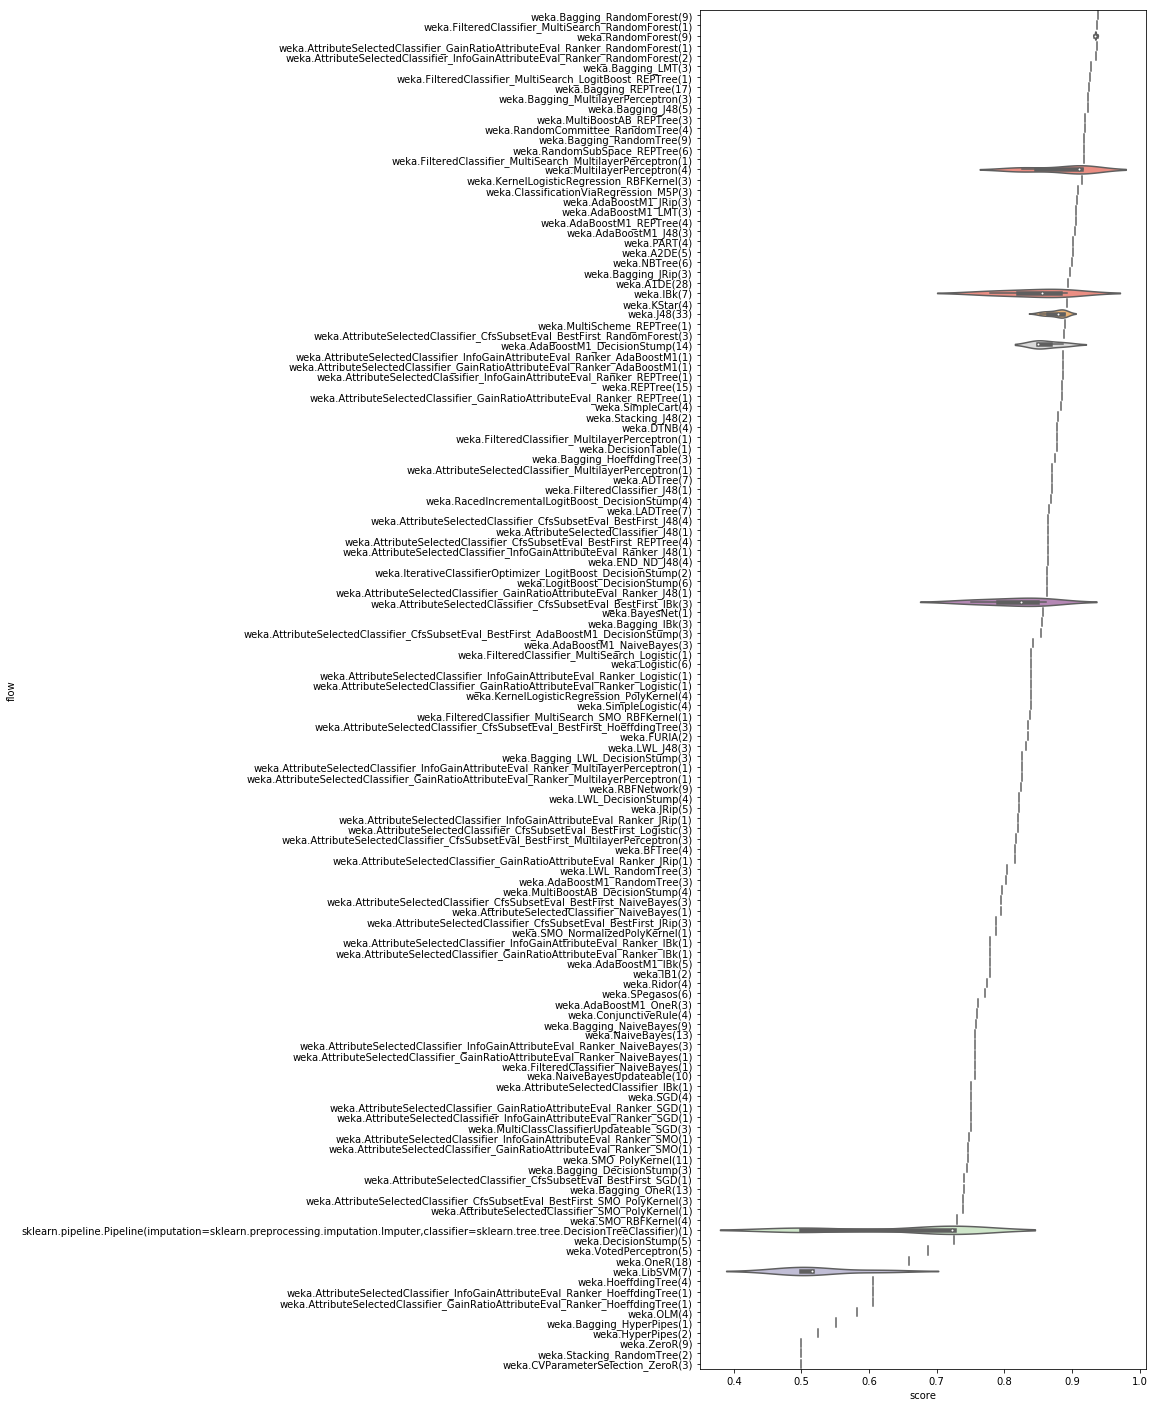

In [163]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot
from openml import evaluations

# Get the list of runs for task 3954
evaluations = oml.evaluations.list_evaluations(task=[3954], function='area_under_roc_curve', size=200)
print(len(evaluations))
# Download the tasks and plot the scores
scores = []
for id, e in evaluations.items():
    scores.append({"flow":e.flow_name, "score":e.value})
    
sorted_score = sorted(scores, key=lambda x: -x["score"])
fig, ax = pyplot.subplots(figsize=(8, 25))    
sns.violinplot(ax=ax, x="score", y="flow", data=pd.DataFrame(sorted_score), scale="width", palette="Set3");

Easy benchmarking:

In [162]:
import openml as oml
from sklearn import neighbors

for task_id in [14951,10103]:
    task = oml.tasks.get_task(task_id)
    data = oml.datasets.get_dataset(task.dataset_id)
    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    flow = oml.flows.sklearn_to_flow(clf)
    
    try:
        run = oml.runs.run_flow_on_task(task, flow)
        myrun = run.publish()
        print("kNN on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))
    except oml.exceptions.PyOpenMLError as err:
        print("OpenML: {0}".format(err))

kNN on eeg-eye-state: http://www.openml.org/r/10154944
kNN on volcanoes-a1: http://www.openml.org/r/10154945


In [ ]:
myruns = oml.runs.list_runs(task=[14951],size=10000)
scores = []
for id, _ in myruns.items():
    run = oml.runs.get_run(id)
    if str.startswith(run.flow_name, 'sklearn'):
        scores.append({"flow":run.flow_name, "score":run.evaluations['predictive_accuracy']})

In [ ]:
fig, ax = pyplot.subplots(figsize=(8, 12))
sns.violinplot(x="score", y="flow", data=pd.DataFrame(scores), scale="width", palette="Set3", cut=0);

## A Challenge
Try to build the best possible models on several OpenML tasks, and compare your results with the rest of the class, and learn from them. Some tasks you could try (or browse openml.org):

* EEG eye state: data_id:[1471](http://www.openml.org/d/1471), task_id:[14951](http://www.openml.org/t/14951)
* Volcanoes on Venus: data_id:[1527](http://www.openml.org/d/1527), task_id:[10103](http://www.openml.org/t/10103)
* Walking activity: data_id:[1509](http://www.openml.org/d/1509), task_id: [9945](http://www.openml.org/t/9945), 150k instances
* Covertype (Satellite): data_id:[150](http://www.openml.org/d/150), task_id: [218](http://www.openml.org/t/218). 500k instances
* Higgs (Physics): data_id:[23512](http://www.openml.org/d/23512), task_id:[52950](http://www.openml.org/t/52950). 100k instances, missing values

* Your own uploaded dataset